In [1]:
import numpy as np
import matplotlib.pyplot as plt
from looptools.loop import LOOP
from looptools.component import Component
from looptools.components import LPFComponent, TwoStageLPFComponent

In [2]:
sps = 80e6 # Loop update frequency

# Define components
lpf1 = LPFComponent("Single-stage LPF #1", sps, 5)
lpf2 = LPFComponent("Single-stage LPF #2", sps, 5)
lpf2stage = TwoStageLPFComponent("2-Stage LPF", sps, 5)

# Build loops
loop1 = LOOP(sps, [lpf1, lpf2])
loop2 = LOOP(sps, [lpf2stage])

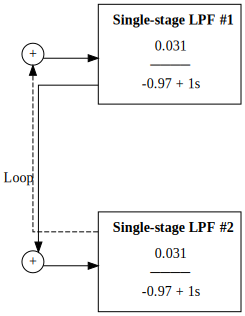

In [3]:
loop1.block_diagram(transfer_functions=True)

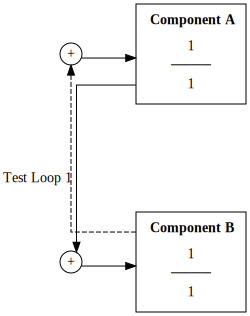

In [4]:
# Test 1: Simple two-component loop (single row)
test_loop1 = LOOP(sps, [
    Component("Component A", sps),
    Component("Component B", sps)
], "Test Loop 1")
dot1 = test_loop1.block_diagram(transfer_functions=True)
dot1

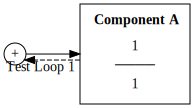

In [5]:
test_loop0 = LOOP(sps, [
    Component("Component A", sps)
], "Test Loop 1")
dot1 = test_loop0.block_diagram(transfer_functions=True)
dot1

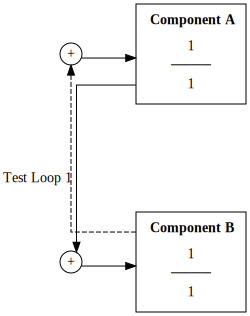

In [6]:
# Test 1: Simple two-component loop (single row)
test_loop1 = LOOP(sps, [
    Component("Component A", sps),
    Component("Component B", sps)
], "Test Loop 1")
dot1 = test_loop1.block_diagram(transfer_functions=True)
dot1

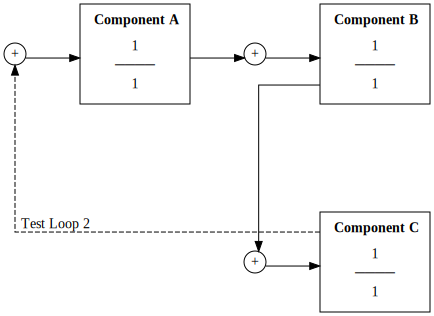

In [7]:
# Test 2: Three-component loop (2 top, 1 bottom)
test_loop2 = LOOP(sps, [
    Component("Component A", sps),
    Component("Component B", sps),
    Component("Component C", sps)
], "Test Loop 2")
dot2 = test_loop2.block_diagram(transfer_functions=True)
dot2

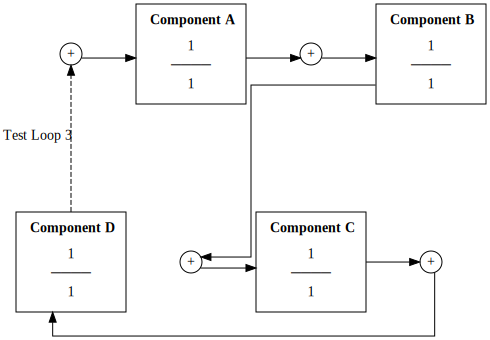

In [8]:
# Test 3: Four-component loop (2 top, 2 bottom)
test_loop3 = LOOP(sps, [
    Component("Component A", sps),
    Component("Component B", sps),
    Component("Component C", sps),
    Component("Component D", sps)
], "Test Loop 3")
dot3 = test_loop3.block_diagram(transfer_functions=True)
dot3

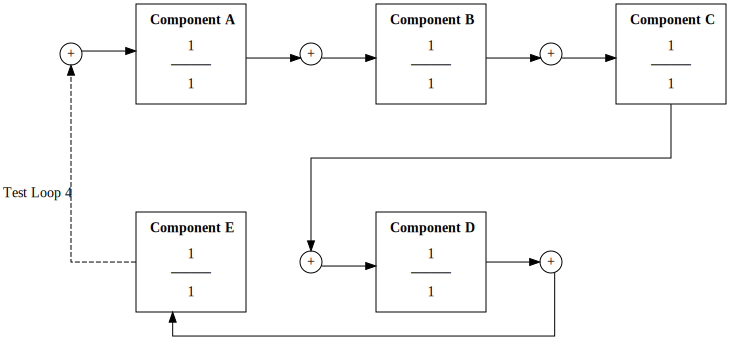

In [9]:
# Test 4: Five-component loop (3 top, 2 bottom)
test_loop4 = LOOP(sps, [
    Component("Component A", sps),
    Component("Component B", sps),
    Component("Component C", sps),
    Component("Component D", sps),
    Component("Component E", sps)
], "Test Loop 4")
dot4 = test_loop4.block_diagram(transfer_functions=True)
dot4

In [ ]:
loop2.block_diagram()

In [ ]:
frfr = np.logspace(np.log10(1e2), np.log10(1e7), int(1e5)) # Fourier frequency array (Hz)

fig, axes = loop1.bode_plot(frfr)
plt.show()

In [ ]:
fig, axes = loop1.bode_plot(frfr, label='loop1')
loop2.bode_plot(frfr, axes=axes, label='loop2', ls='--')
plt.show()

In [ ]:
fig, axes = loop1.bode_plot(frfr, which='G', figsize=(5,3), label=False, title='Open-loop transfer function')
plt.show()

In [ ]:
fig, axes = loop1.nyquist_plot(frfr, arrow_scale=0.5, critical_point=True)
plt.show()

In [ ]:
fig, axes = lpf1.bode_plot(frfr, figsize=(6,3))
lpf2stage.bode_plot(frfr, axes=axes, ls='--', label=None)
plt.show()

In [ ]:
comp_list = [
    Component("Photoreceiver (Measured TF)", sps),
    Component("ADC (MultiplierComponent)", sps),
    Component("Mixer (?)", sps),
    Component("LPF (TwoStageLPFComponent)", sps),
    Component("P-Controller (LeftBitShiftComponent)", sps),
    Component("II-Controller (DoubleIntegratorComponent)", sps),
    Component("DAC (MultiplierComponent)", sps),
    Component("Laser (ActuatorComponent)", sps),
]

loop1 = LOOP(sps, comp_list, "Feedback loop")
dot = loop1.block_diagram(transfer_functions=True)
dot

In [ ]:
dot.render('test.pdf')